<a href="https://colab.research.google.com/github/miguel-kjh/Sign-languages/blob/master/Sign_languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


0  1  2  3  4  5  6  7	8  9  _DS_Store


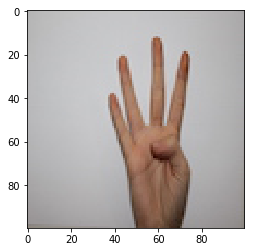

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/Sign-Language"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/Sign-Language/4/IMG_1132.JPG', 'r')
imshow(np.asarray(pil_im))

In [0]:
from keras.models import *
from keras.layers import *
from keras.applications import VGG16
from keras import layers
from keras import optimizers
from keras import utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [0]:
# DATA SOURCE --------------------------------------------------

batch_size = 50
image_size = 150

data_dir = '/content/drive/My Drive/Colab Notebooks/Sign-Language'

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.25)

train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset="training")

validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset="validation")

Found 1551 images belonging to 10 classes.
Found 511 images belonging to 10 classes.


# **PRIMER MODELO**

In [0]:
# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 39200)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               10035456  
__________

In [0]:
# TRAINING --------------------------------------------------

epochs = 100

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
)

Epoch 1/100
31/31 [==============================] - 14s 462ms/step - loss: 2.9612 - acc: 0.1632 - val_loss: 2.1677 - val_acc: 0.1980
Epoch 2/100
31/31 [==============================] - 13s 413ms/step - loss: 1.8478 - acc: 0.3916 - val_loss: 1.7999 - val_acc: 0.3688
Epoch 3/100
31/31 [==============================] - 14s 440ms/step - loss: 1.2398 - acc: 0.6035 - val_loss: 1.6409 - val_acc: 0.4664
Epoch 4/100
31/31 [==============================] - 13s 431ms/step - loss: 1.1458 - acc: 0.6562 - val_loss: 1.6010 - val_acc: 0.4816
Epoch 5/100
31/31 [==============================] - 13s 408ms/step - loss: 0.8628 - acc: 0.7397 - val_loss: 1.5369 - val_acc: 0.5141
Epoch 6/100
31/31 [==============================] - 13s 405ms/step - loss: 0.6722 - acc: 0.7901 - val_loss: 1.3337 - val_acc: 0.5813
Epoch 7/100
31/31 [==============================] - 12s 402ms/step - loss: 0.6247 - acc: 0.8043 - val_loss: 1.5849 - val_acc: 0.5510
Epoch 8/100
31/31 [==============================] - 13s 409ms

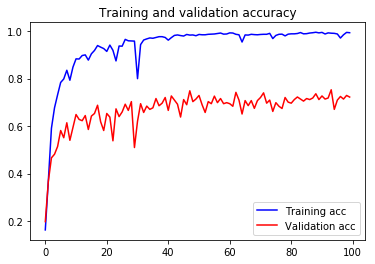

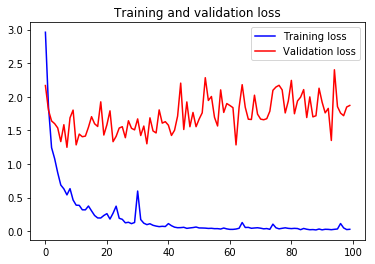

In [0]:
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
   
  epochs = range(len(acc))
   
  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
   
  plt.figure()
   
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
   
  plt.show()

# Uso de la VGG16

In [0]:
from keras.applications import VGG16

vgg_conv = VGG16(weights='imagenet', 
                 include_top=False, 
                 input_shape=(image_size, image_size, 3))

for layer in vgg_conv.layers:
    layer.trainable = False

    
    
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
vgg_conv.summary()


<keras.engine.input_layer.InputLayer object at 0x7f47e18cc4a8> False
<keras.layers.convolutional.Conv2D object at 0x7f47e18b4198> False
<keras.layers.convolutional.Conv2D object at 0x7f47e18b4ba8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f47e1996320> False
<keras.layers.convolutional.Conv2D object at 0x7f47e1996940> False
<keras.layers.convolutional.Conv2D object at 0x7f47e0062198> False
<keras.layers.pooling.MaxPooling2D object at 0x7f47e1971908> False
<keras.layers.convolutional.Conv2D object at 0x7f47e1971978> False
<keras.layers.convolutional.Conv2D object at 0x7f47e193b0b8> False
<keras.layers.convolutional.Conv2D object at 0x7f47e2006ac8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f47e2048358> False
<keras.layers.convolutional.Conv2D object at 0x7f47e2048278> False
<keras.layers.convolutional.Conv2D object at 0x7f47e204f128> False
<keras.layers.convolutional.Conv2D object at 0x7f47e20344e0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f47e1ff84a8>

In [0]:
x = Flatten()(vgg_conv.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax')(x)
model_vgg16 = Model(inputs = vgg_conv.input, outputs = x)
 

model_vgg16.summary()
model_vgg16.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
# TRAINING --------------------------------------------------

epochs = 100

history = model_vgg16.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
)

Epoch 1/100
31/31 [==============================] - 17s 559ms/step - loss: 1.5343 - acc: 0.5240 - val_loss: 1.0307 - val_acc: 0.6551
Epoch 2/100
31/31 [==============================] - 13s 405ms/step - loss: 0.6347 - acc: 0.8030 - val_loss: 0.6386 - val_acc: 0.8000
Epoch 3/100
31/31 [==============================] - 14s 467ms/step - loss: 0.4731 - acc: 0.8566 - val_loss: 0.5469 - val_acc: 0.8221
Epoch 4/100
31/31 [==============================] - 13s 429ms/step - loss: 0.4032 - acc: 0.8818 - val_loss: 0.5205 - val_acc: 0.8265
Epoch 5/100
31/31 [==============================] - 13s 428ms/step - loss: 0.2751 - acc: 0.9270 - val_loss: 0.4475 - val_acc: 0.8438
Epoch 6/100
31/31 [==============================] - 14s 446ms/step - loss: 0.2387 - acc: 0.9309 - val_loss: 0.4730 - val_acc: 0.8265
Epoch 7/100
31/31 [==============================] - 13s 427ms/step - loss: 0.2965 - acc: 0.9102 - val_loss: 0.4105 - val_acc: 0.8547
Epoch 8/100
31/31 [==============================] - 13s 430ms

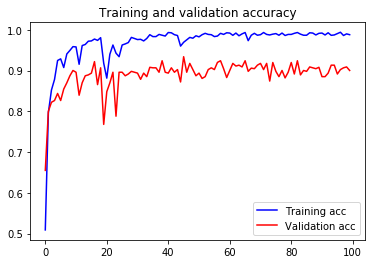

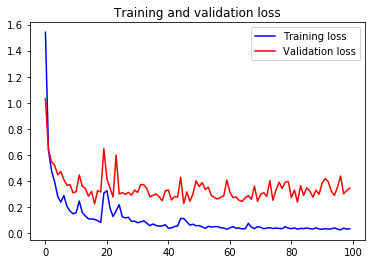

In [0]:
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
   
  epochs = range(len(acc))
   
  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
   
  plt.figure()
   
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
   
  plt.show()